# <center>ProDy Tutorial: Gaussian Network Models</center>

## <center>GNM - Minimal Theory</center>

<center><img src="https://upload.wikimedia.org/wikipedia/en/e/e7/MassSpringNetwork.jpg" width=500 height=500></center>

The potential energy of a Gaussian Network Model is defined as the summation of harmonic potentials over all unique $(i,j)$-pairs and is a function of only the square of **inter-residue distance vector**, $\Delta \mathbf{R}_{ij} = \mathbf{R}_i - \mathbf{R}_j^0$. It can be given in terms of the **Kirchhoff matrix for inter-residue contacts**, $\mathbf{\Gamma}$,

$$
V^{GNM} = \frac{\gamma}{2} \Delta \mathbf{R}^T \left( \mathbf{\Gamma} \otimes \mathbf{I}_{3\times 3} \right) \Delta \mathbf{R} \,,
$$

where $\mathbf{\Gamma}$ is an $(N \times N)$-matrix and is defined as:

$$
\mathbf{\Gamma}_{ij} = \left\{\begin{matrix} 
-1 & \text{if } i \ne j \text{ and }R_{ij} \le R_{cut} \,,  \\ 
0 & \text{if } i \ne j \text{ and }R_{ij} > R_{cut} \,,  \\
-\sum_{j,j \ne i}^{N} \mathbf{\Gamma}_{ij} & \text{if } i = j \,. \end{matrix}\right.
$$

## <center> GNM Module<center>

First, let's import all the required packages!

In [1]:
from numpy import *
from matplotlib.pyplot import *
from prody import *
confProDy(auto_show=False)
confProDy(auto_secondary=True)

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


***Tip:*** how to access the documentation

- ProDy website: [reference manual](http://prody.csb.pitt.edu/manual/reference/index.html)
- see docstring of a method (?, ??)
- quick look at the parameter list (shift-Tab)
- jupyter syntax & shortcuts (h)

In [ ]:
parsePDB?

Parse the PDB structure for **adenylate kinase**. 

In [2]:
ake = parsePDB('4ake', compressed=False)
ake

@> PDB file is found in working directory (4ake.pdb).
@> 3459 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> Secondary structures were assigned to 279 residues.


<AtomGroup: 4ake (3459 atoms)>

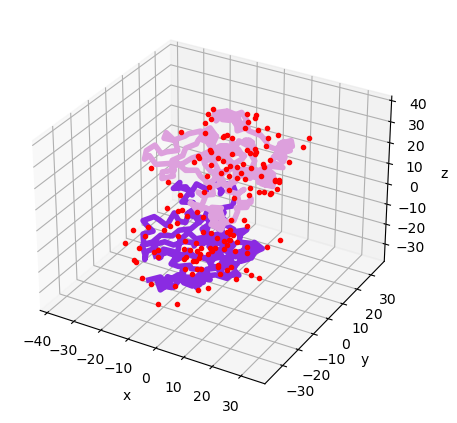

In [3]:
figure(dpi=100)
showProtein(ake);

This PDB file contains 2 chains. If we only want to use $C^{\alpha}$ atoms from chain A, then we can select it as:

In [4]:
calphas = ake.select('calpha and chain A')
calphas

<Selection: 'calpha and chain A' from 4ake (214 atoms)>

In [5]:
calphas.numAtoms()

214

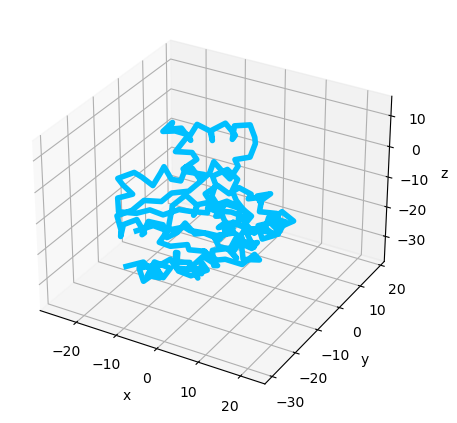

In [6]:
figure(dpi=100)
showProtein(calphas);

## Computing GNM normal modes

See also the [online tutorial](http://prody.csb.pitt.edu/tutorials/enm_analysis/gnm.html).

First, let's instantiate an object of GNM class.

In [7]:
gnm = GNM('AKE')   # assign a name 

Now, we can build the Kirchhoff matrix by the method `buildKirchhoff`.

What are the parameters of this method?

In [ ]:
gnm.buildKirchhoff?

Let's build Kirchhoff matrix based on the coordinate of $C^{\alpha}$-atoms already selected.

In [8]:
gnm.buildKirchhoff(calphas)

@> Kirchhoff was built in 0.02s.


We can get the Kirchhoff matrix by the following method:

In [9]:
gnm.getKirchhoff()

array([[17., -1., -1., ...,  0., -1.,  0.],
       [-1., 19., -1., ...,  0.,  0.,  0.],
       [-1., -1., 23., ...,  0., -1.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 15., -1., -1.],
       [-1.,  0., -1., ..., -1., 15., -1.],
       [ 0.,  0.,  0., ..., -1., -1.,  7.]])

Check that every row sum is equal to 0 (since it is a Kirchhoff matrix!):

In [10]:
apply_along_axis(sum, 1, gnm.getKirchhoff())

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Degrees of residues:

In [11]:
diag(gnm.getKirchhoff())

array([17., 19., 23., 20., 21., 24., 21., 21., 15., 17., 21., 16., 21.,
       15., 13., 17., 16., 13., 14., 21., 16., 10., 12., 16., 16., 20.,
       20., 19., 19., 14., 17.,  8., 10., 16., 21., 14., 16., 20., 18.,
       11., 11., 13., 13., 10., 17., 20., 14., 15., 24., 20., 13., 14.,
       14.,  9.,  9.,  9., 11., 10., 15., 11., 15., 11., 15., 20., 19.,
       14., 20., 19., 15., 14., 17., 17., 11.,  9.,  9., 13., 18., 13.,
       12., 20., 22., 24., 21., 18., 17., 17., 22., 14., 16., 18., 11.,
       17., 19., 14., 15., 20., 12., 10., 11.,  9., 15., 14., 20., 16.,
       21., 22., 21., 20., 21., 17., 20., 12., 17., 10., 12., 19., 20.,
       15., 17., 20., 21., 17., 21., 25., 20., 22., 15.,  9., 10.,  8.,
       13., 18., 22., 17., 14., 11., 10., 11., 18., 19., 11., 11., 14.,
       18., 19., 23., 16., 11., 10., 12., 14., 15., 21., 16., 17., 15.,
       11., 12., 18., 15., 15., 12., 13., 21., 17., 11., 15., 17., 13.,
       11., 15., 14., 10., 14., 19., 12., 13., 20., 21., 12., 15

## Calculate normal modes

We can calculate normal modes from the Kirchhoff matrix by the method calcModes. Many parameters in this function can be adjusted, e.g. the number of modes: [calcModes( ) doc](http://prody.csb.pitt.edu/manual/reference/dynamics/gnm.html?highlight=gnm#prody.dynamics.gnm.GNM.calcModes)

In [ ]:
gnm.calcModes?

In [12]:
gnm.calcModes(n_modes=None)   # or: (n_modes='all')
gnm.calcModes(n_modes=10)
gnm.calcModes() # n_modes=20 (default)
gnm.calcModes(n_modes=None, zeros=True)

@> 213 modes were calculated in 0.02s.
@> 10 modes were calculated in 0.01s.
@> 20 modes were calculated in 0.01s.
@> 214 modes were calculated in 0.01s.


The algebraic multiplicity of zero eigenvalues determines separate connected components of your graph.

If it is equal to **one**, then your graph does not have **a disconnected piece!**

Get eigenvalues and eigenvectors:

In [13]:
gnm.getEigvals().round(3)

array([ 0.   ,  0.269,  0.721,  1.724,  1.818,  2.47 ,  3.163,  3.644,
        4.007,  4.487,  4.735,  5.081,  5.513,  5.861,  5.958,  6.354,
        6.878,  7.008,  7.811,  8.366,  8.483,  8.655,  8.907,  9.241,
        9.436,  9.692,  9.72 ,  9.812,  9.902, 10.   , 10.029, 10.166,
       10.2  , 10.259, 10.356, 10.5  , 10.583, 10.672, 10.83 , 10.914,
       10.968, 11.073, 11.079, 11.178, 11.228, 11.319, 11.348, 11.587,
       11.602, 11.666, 11.713, 11.832, 11.876, 11.891, 12.057, 12.155,
       12.237, 12.32 , 12.364, 12.393, 12.556, 12.627, 12.682, 12.745,
       12.808, 12.905, 12.985, 13.023, 13.149, 13.213, 13.335, 13.364,
       13.424, 13.493, 13.531, 13.602, 13.63 , 13.674, 13.711, 13.863,
       13.974, 14.019, 14.074, 14.175, 14.252, 14.346, 14.413, 14.528,
       14.566, 14.678, 14.729, 14.857, 14.876, 14.903, 14.94 , 15.025,
       15.117, 15.178, 15.248, 15.265, 15.379, 15.465, 15.548, 15.686,
       15.714, 15.767, 15.867, 15.966, 16.03 , 16.05 , 16.147, 16.245,
      

In [14]:
gnm.getEigvecs()

array([[-6.83585927e-02, -3.79701566e-02, -4.77931134e-02, ...,
         3.76043868e-02, -2.13309431e-03,  2.83350793e-04],
       [-6.83585927e-02, -3.75314005e-02, -4.29447743e-02, ...,
         1.56887209e-03,  3.40483121e-02, -3.00940005e-03],
       [-6.83585927e-02, -3.37680462e-02, -4.95796980e-02, ...,
        -2.88959856e-01, -3.49790703e-01,  2.82192420e-02],
       ...,
       [-6.83585927e-02, -2.41285052e-02, -8.17901139e-02, ...,
        -1.81951264e-02, -1.29603442e-02,  9.32514785e-04],
       [-6.83585927e-02, -2.95776906e-02, -7.40175168e-02, ...,
        -1.16573784e-03,  3.16782818e-02, -2.46884793e-03],
       [-6.83585927e-02, -2.88623463e-02, -8.68546290e-02, ...,
         1.83255658e-03,  1.22212248e-03, -8.27600768e-05]])

***NB:*** The eigenvector corresponding to 0 eigenvalue is always constant.

In [15]:
gnm.getEigvecs()[:, 0]

array([-0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06835859,
       -0.06835859, -0.06835859, -0.06835859, -0.06835859, -0.06

How about the variances:

In [16]:
gnm.getVariances()[1:].round(3)

array([3.713, 1.387, 0.58 , 0.55 , 0.405, 0.316, 0.274, 0.25 , 0.223,
       0.211, 0.197, 0.181, 0.171, 0.168, 0.157, 0.145, 0.143, 0.128,
       0.12 , 0.118, 0.116, 0.112, 0.108, 0.106, 0.103, 0.103, 0.102,
       0.101, 0.1  , 0.1  , 0.098, 0.098, 0.097, 0.097, 0.095, 0.094,
       0.094, 0.092, 0.092, 0.091, 0.09 , 0.09 , 0.089, 0.089, 0.088,
       0.088, 0.086, 0.086, 0.086, 0.085, 0.085, 0.084, 0.084, 0.083,
       0.082, 0.082, 0.081, 0.081, 0.081, 0.08 , 0.079, 0.079, 0.078,
       0.078, 0.077, 0.077, 0.077, 0.076, 0.076, 0.075, 0.075, 0.074,
       0.074, 0.074, 0.074, 0.073, 0.073, 0.073, 0.072, 0.072, 0.071,
       0.071, 0.071, 0.07 , 0.07 , 0.069, 0.069, 0.069, 0.068, 0.068,
       0.067, 0.067, 0.067, 0.067, 0.067, 0.066, 0.066, 0.066, 0.066,
       0.065, 0.065, 0.064, 0.064, 0.064, 0.063, 0.063, 0.063, 0.062,
       0.062, 0.062, 0.062, 0.061, 0.061, 0.061, 0.061, 0.06 , 0.06 ,
       0.06 , 0.06 , 0.059, 0.059, 0.059, 0.059, 0.058, 0.058, 0.058,
       0.058, 0.058,

***NB:*** A more compact way to compute GNM is to use the function [calcGNM( ) doc](http://prody.csb.pitt.edu/manual/reference/dynamics/gnm.html?highlight=gnm#prody.dynamics.gnm.calcGNM) 

## How to plot results

In [17]:
gnm.calcModes()

@> 20 modes were calculated in 0.01s.


The contact map can be visualized with the command:

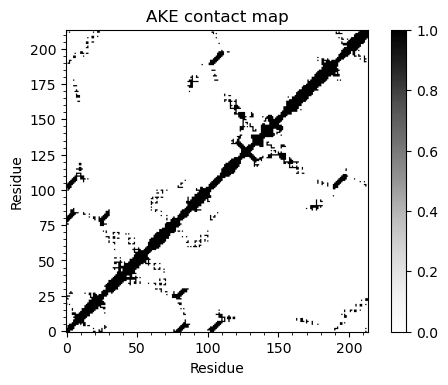

In [18]:
figure(dpi=100)
showContactMap(gnm, cmap='Greys');

... while the shape of normal modes can be visualized by typing: 

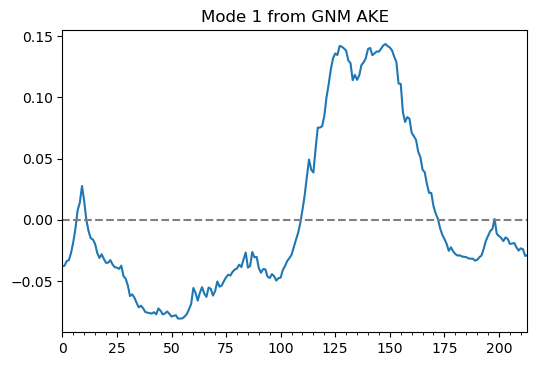

In [19]:
figure(dpi=100)
showMode(gnm[0]);

We can show possible hinge sites on that plot as well.

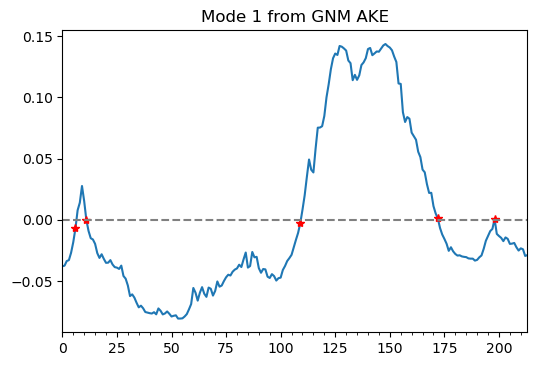

In [20]:
figure(dpi=100)
showMode(gnm[0], hinges=True);

**Furthermore**, you can also access hinge sites identified from multiple modes (e.g. 2 modes) by:

In [21]:
calcHinges(gnm[:2])

[6, 11, 28, 74, 91, 94, 95, 97, 100, 109, 120, 156, 172, 198]

Many other visualization tools can be found online at the page [Plotting Functions](http://prody.csb.pitt.edu/manual/reference/dynamics/plotting.html?).

## GNM covariance and (normalized/orientational) cross-correlation matrices

Let's get the covariance matrix first, $C_{ij} \propto \sum_{i=1}^{N-1} \lambda_i^{-1} \mathbf{u}_i \mathbf{u}_i^T$:

In [22]:
cov = gnm.getCovariance()
cov.shape

(214, 214)

In [23]:
cov

array([[0.02235368, 0.01863088, 0.01536492, ..., 0.00840091, 0.01409038,
        0.01147617],
       [0.01863088, 0.01745801, 0.01497417, ..., 0.00786158, 0.01168132,
        0.0059725 ],
       [0.01536492, 0.01497417, 0.01395891, ..., 0.00993459, 0.01210848,
        0.00661435],
       ...,
       [0.00840091, 0.00786158, 0.00993459, ..., 0.02689691, 0.02338466,
        0.03495323],
       [0.01409038, 0.01168132, 0.01210848, ..., 0.02338466, 0.0241067 ,
        0.03944248],
       [0.01147617, 0.0059725 , 0.00661435, ..., 0.03495323, 0.03944248,
        0.16032265]])

Alternative ways to compute the covariance and (normalized/orientational) cross-correlation matrix, $C_{ij}^{(n)} = C_{ij} \big/ \left(C_{ii} C_{jj} \right)^{1/2}$:

In [24]:
C1 = calcCovariance(gnm)

# again covariance matrix for GNM, not for ANM!
C2 = calcCrossCorr(gnm, norm=False)

# normalized/orientational cross-correlation matrix
C3 = calcCrossCorr(gnm)

In [25]:
all(C1 == cov)

True

In [26]:
all(C2 == cov)

True

In [27]:
all(C3 == cov)

False

In [28]:
C3

array([[1.        , 0.94310805, 0.86982101, ..., 0.34261045, 0.60698702,
        0.19170129],
       [0.94310805, 1.        , 0.95922324, ..., 0.36279501, 0.56941066,
        0.11289159],
       [0.86982101, 0.95922324, 1.        , ..., 0.51271113, 0.6600774 ,
        0.13981819],
       ...,
       [0.34261045, 0.36279501, 0.51271113, ..., 1.        , 0.91835592,
        0.53227809],
       [0.60698702, 0.56941066, 0.6600774 , ..., 0.91835592, 1.        ,
        0.63445073],
       [0.19170129, 0.11289159, 0.13981819, ..., 0.53227809, 0.63445073,
        1.        ]])

We can visualize the **normalized/orientational** cross-correlations between residue fluctuations with the command:

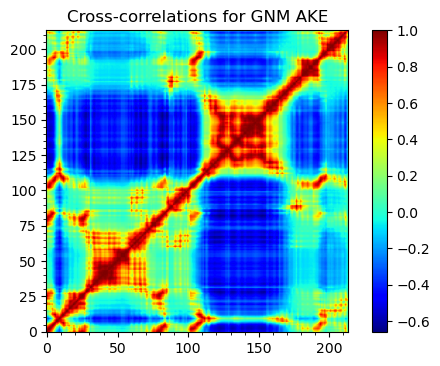

In [29]:
figure(dpi=100)
showCrossCorr(gnm);

The residues' **mean square fluctuations (MSF)** are found on the diagonal of the covariance matrix and describe the residue mobility or flexibility.

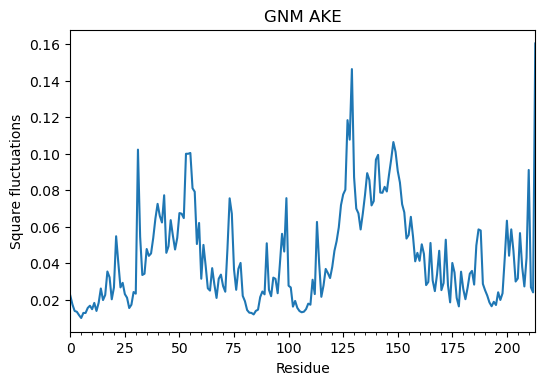

In [30]:
# MSFs from the "computed" modes,
# and here the total number of calculated modes is 20.

figure(dpi=100)
showSqFlucts(gnm);

**Moreover**, you can specify the number of modes to compute the MSFs to see either their indivudual or cumulative contributions visually as well!

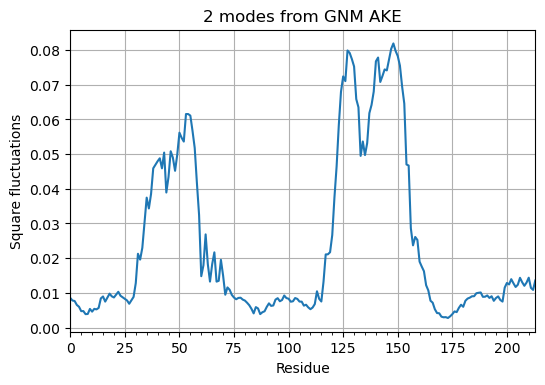

In [31]:
# square fluctuations computed from 2 slowest (lowest-energy) modes

figure(dpi=100)
showSqFlucts(gnm[:2])
grid();

## Comparison of MSFs with experimental B-factors (Debye-Waller factor)

We can also see how well the computed MSF correlates with the **experimental B-factors** ***(Debye-Waller)*** extracted from the PDB file. It is better to use all modes for this aim.

In [32]:
gnm.calcModes(None)

@> 213 modes were calculated in 0.01s.


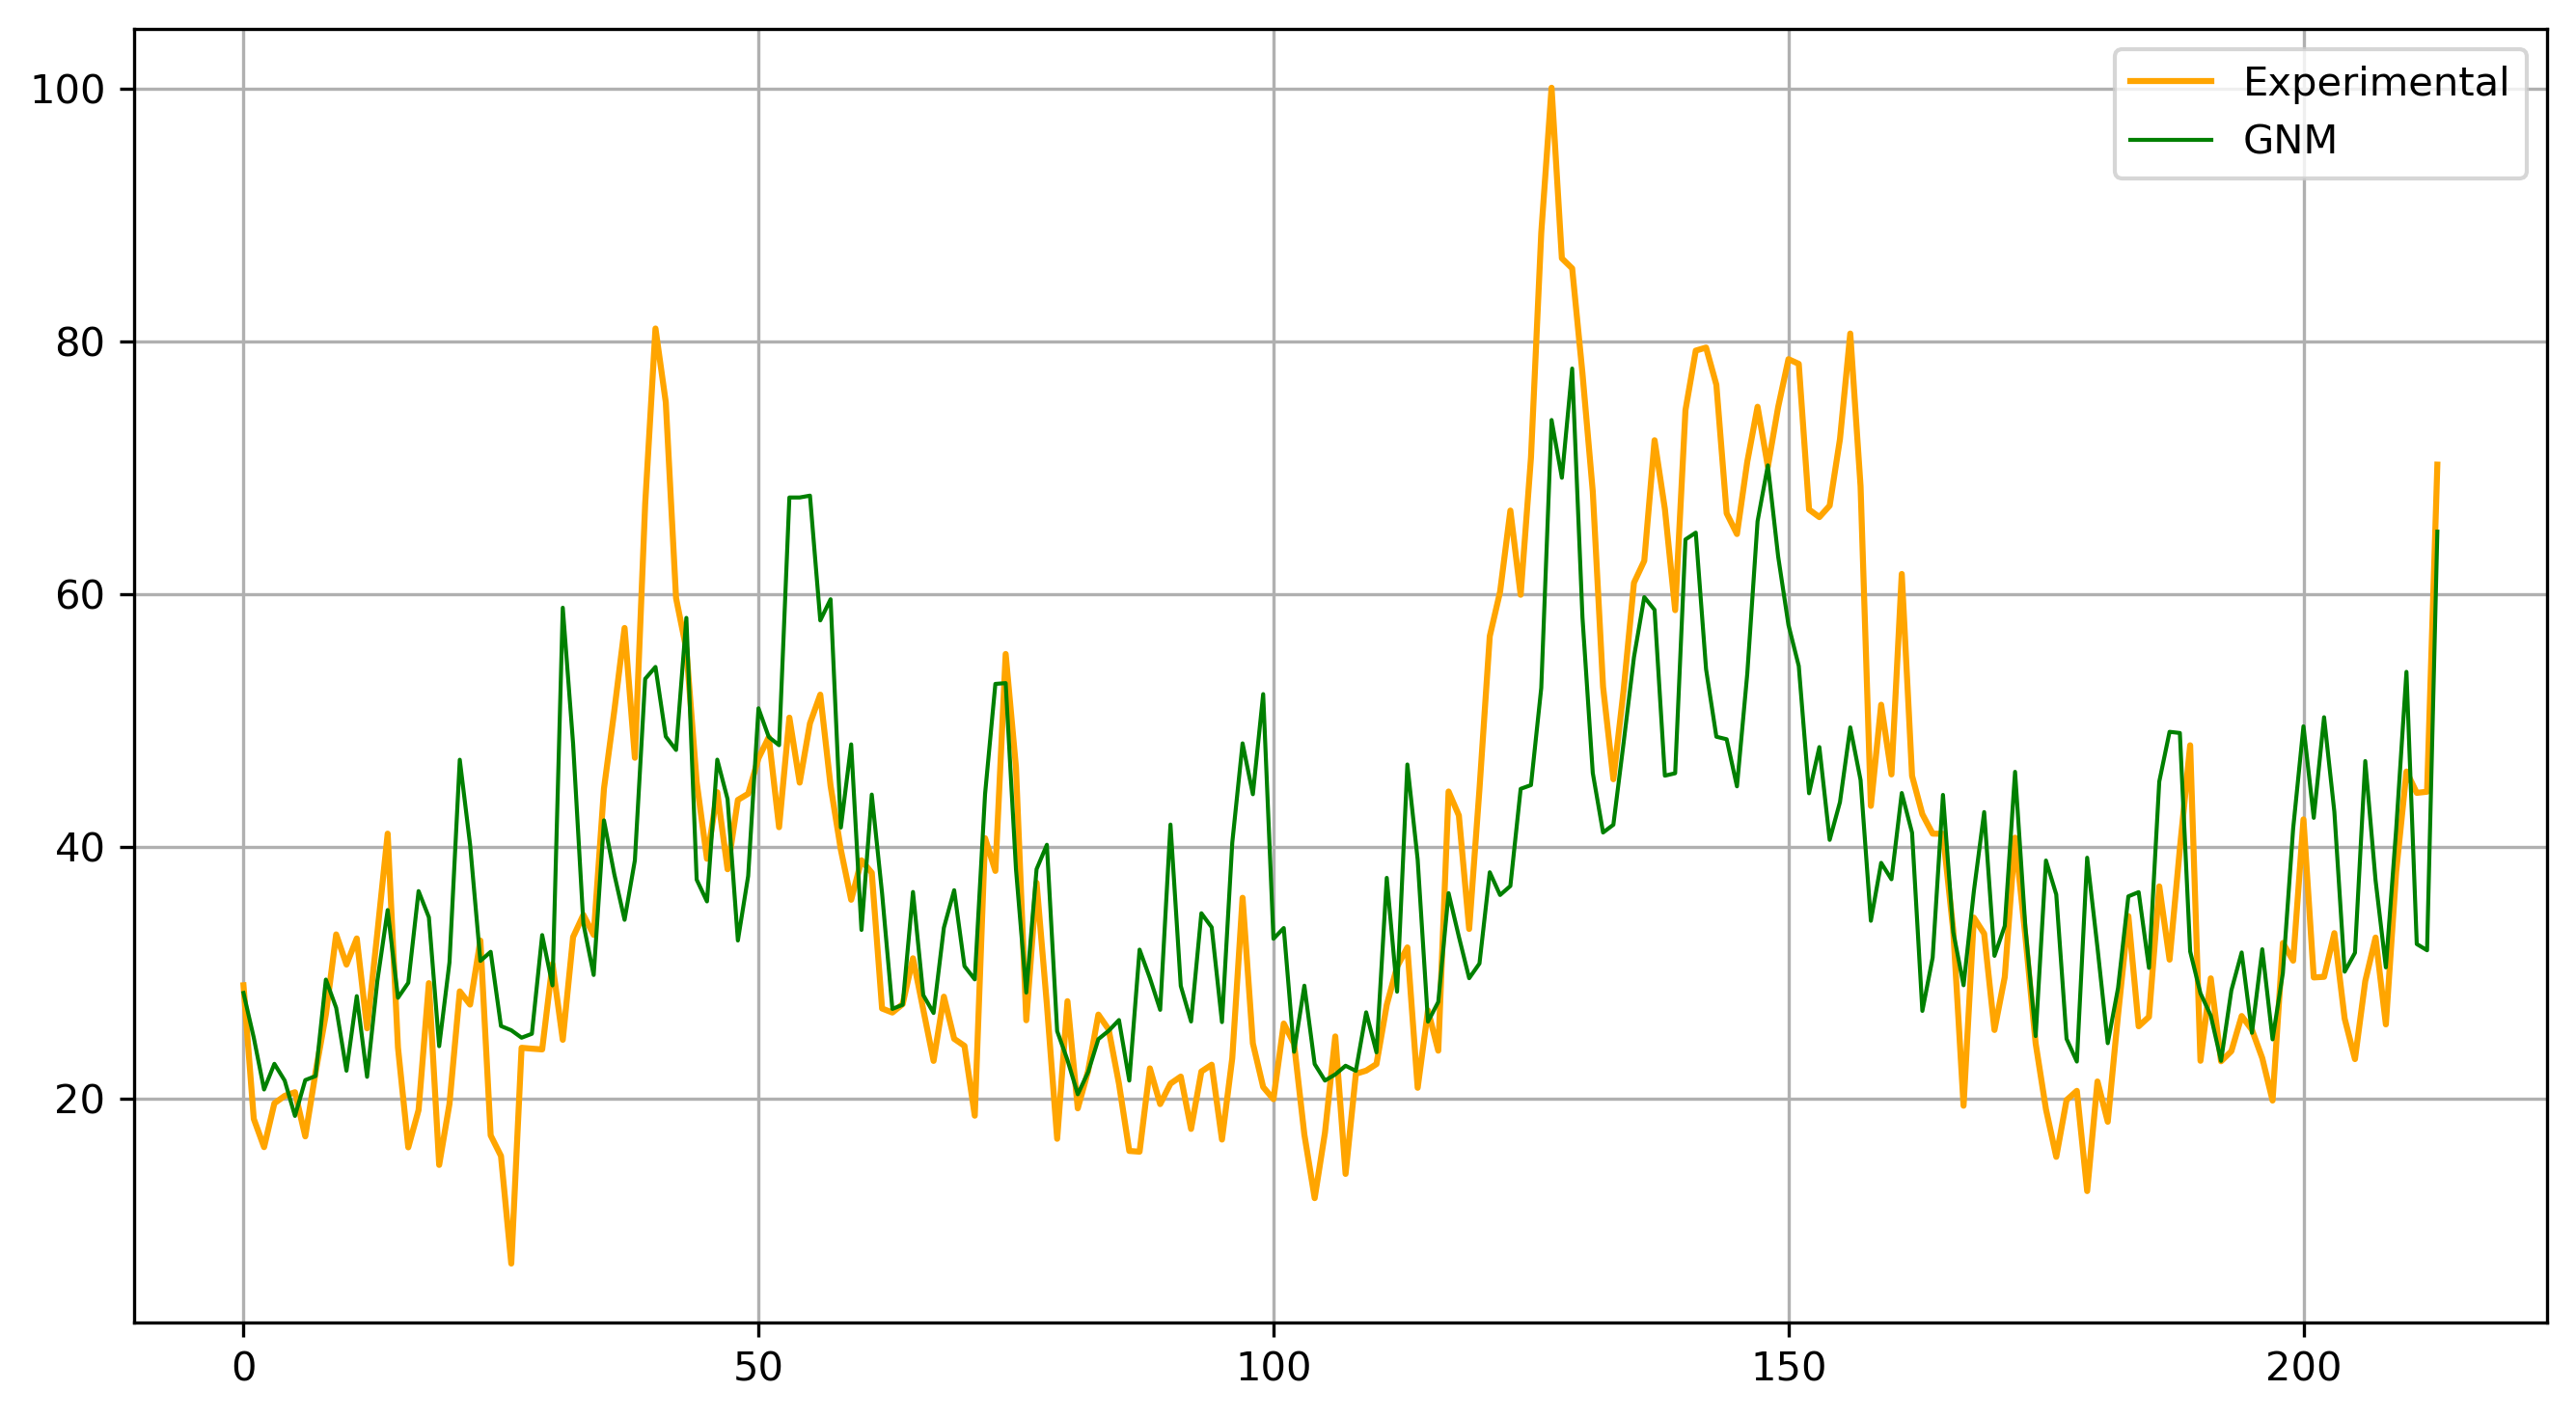

In [33]:
# rescale MSFs

bfactors = calphas.getBetas()
msfs = calcSqFlucts(gnm)
msfs = msfs / mean(msfs) * mean(bfactors)

figure(figsize=(9, 5), dpi=300)
plot(bfactors, 'orange', label='Experimental')
plot(msfs, 'g', lw=1., label='GNM')
grid()
legend()
tight_layout();

Let's calculate the effective force constant $\gamma$ of GNM springs in $k_B T \mathring{A}^{-2}$:

In [34]:
rescaling_prefactor = (bfactors.mean() / calcSqFlucts(gnm).mean())
rescaling_prefactor.round(5)

373.72302

In [35]:
gamma = 8 * pi**2 / rescaling_prefactor
gamma.round(5)

0.21127

Let's evaluate Pearson's correlation coefficient between experimental B-factors and GNM predicted MSFs:

In [36]:
corrcoef(calphas.getBetas(), calcSqFlucts(gnm))[0, 1].round(3)

0.76

The values above are equal to those that [DynOmics](http://dynomics.pitt.edu/) server gives!

## Visualize modes and MSFs on protein's 3D structure

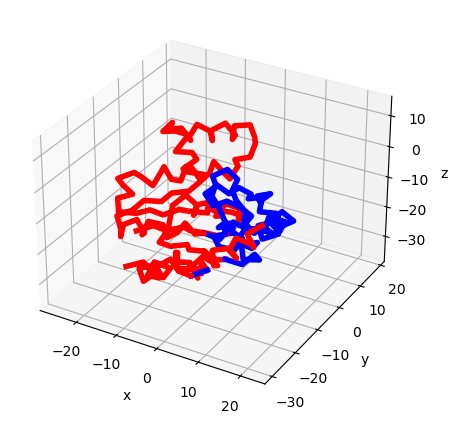

In [37]:
figure(dpi=100)
showProtein(calphas, mode=gnm[0]);

GNM modes and square fluctuations can also be saved in *.nmd* format and visualized with the VMD plugin **NMWizard**:

This plugin can be found by navigating from Extensions in VMD main menu --> Analysis --> Normal Mode Wizard.

In [38]:
writeNMD('AKE_gnm.nmd', gnm, calphas)

'AKE_gnm.nmd'

We can now run VMD from jupyter notebook using an exclamation mark to tell the jupyter notebook that it is a command run by the operating system not by the python kernel.

Alternatively, MSFs can be stored in the *tempFactor* column of a PDB file and again visualized in VMD:

In [39]:
msf_10 = calcSqFlucts(gnm[:10])
writePDB('AKE_sqFlucts_on_beta.pdb', calphas, beta=msf_10)

'AKE_sqFlucts_on_beta.pdb'

## Caveat - flexible loops/termini

@> PDB file is found in working directory (1aar.pdb).
@> 76 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> Secondary structures were assigned to 47 residues.
@> Kirchhoff was built in 0.01s.
@> 20 modes were calculated in 0.00s.


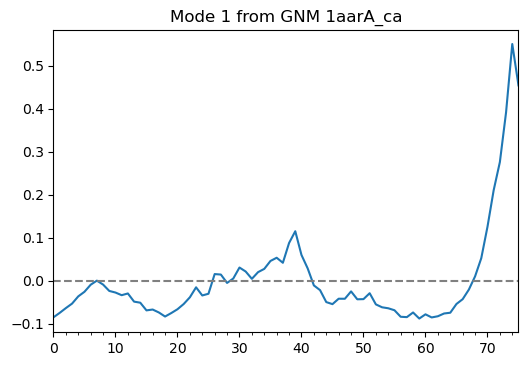

In [40]:
ubi = parsePDB('1aar', chain='A', subset='calpha', compressed=False)
ubi_gnm, ubi_calphas = calcGNM(ubi, cutoff=10)

figure(dpi=100)
showMode(ubi_gnm[0]);

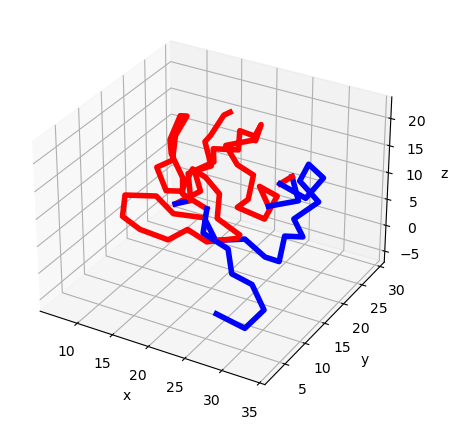

In [41]:
figure(dpi=100)
showProtein(ubi_calphas, mode=ubi_gnm[0]);

The unfolded C-terminal (residues 71-76) of ubiquitin is particularly flexible and its contribution to total residue fluctuations is dominant. Therefore, we need to exclude it from the analysis.

@> Kirchhoff was built in 0.00s.
@> 20 modes were calculated in 0.00s.


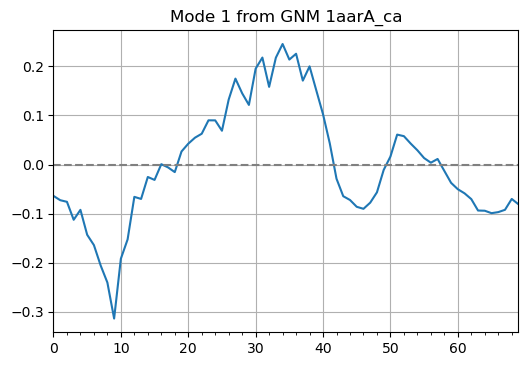

In [42]:
ubi_gnm_fixed, ubi_calphas_fixed = calcGNM(ubi.select('resnum < 71'), cutoff=10)

figure(dpi=100)
showMode(ubi_gnm_fixed[0])
grid();

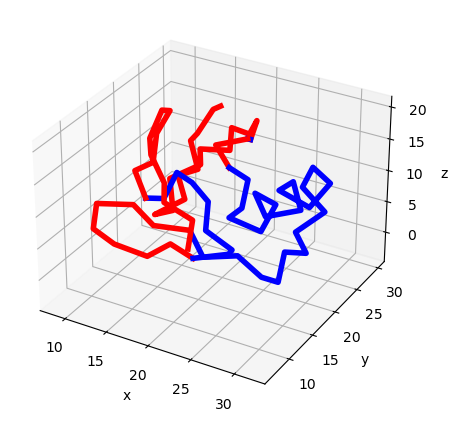

In [43]:
figure(dpi=100)
showProtein(ubi_calphas_fixed, mode=ubi_gnm_fixed[0]);

Let's look at the effect of those residues on the collectivity of a particular mode, whose degree basically reflects the number of atoms which are significantly affected by that mode. The collectivity is defined as the exponential of the information entropy of that mode: [`calcCollectivity`](http://prody.csb.pitt.edu/manual/reference/dynamics/analysis.html?highlight=calccollectivity#prody.dynamics.analysis.calcCollectivity)

In [44]:
calcCollectivity(ubi_gnm[0])

0.15484172457629278

In [45]:
calcCollectivity(ubi_gnm_fixed[0])

0.5030864935567463

We can easily compute the collectivity of a set of modes at once!

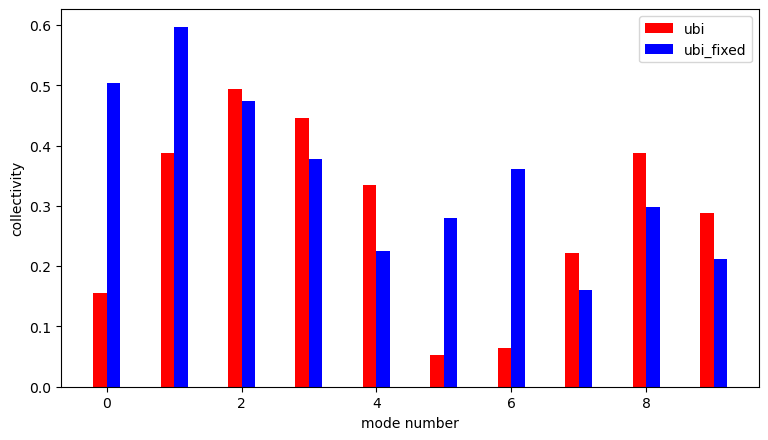

In [46]:
figure(figsize=(9, 5), dpi=100)
bar(arange(10)-0.1, calcCollectivity(ubi_gnm[:10]),  width=.2, color='r', label='ubi')
bar(arange(10)+0.1, calcCollectivity(ubi_gnm_fixed[:10]), width=.2, color='b', label='ubi_fixed')
xlabel('mode number')
ylabel('collectivity')
legend();